In this homework fit and select a classifier to predict credit card default using `default_of_credit_card_clients` dataset from the course folder on Google drive. The data description is available at : https://www.kaggle.com/datasets/jishnukoliyadan/taiwan-default-credit-card-clients

1. Explore (5+5+10=20 points)
  1. load the dataset. Use only the columns "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", and "AGE" among predictors. The target is "default payment next month".
  1. identify the categorical features (with brief 1-3 sentence explanation), and
  1. produce the pairwise scatter plot only for the numeric variables.
1. Prepare a pipeline to (30 points)
  1. standardize the numeric attributes
  1. expand the categorical attributes to columns of 0/1 variables
  1. fit a `RandomForestClassifier` classifier
1. Search over the `max_depth` and `min_samples_leaf` parameters to find the best model per **balanced accuracy** metric. Use at least three different search strategies and discuss any differences you see in the results (≈ 150—200 words). (20 points)
1. Let's assume that the cost of missing a default (i.e., predicting non-default for a customer who ended up defaulting) is 10 times the cost of flagging a non-defaulter as defaulter. Let's further assume that the cost of correct predictions are 0. Use any one of the search strategies considered in the previous question to find the `RandomForestClassifier` that minimizes the cost. (20 points)
1. Collaboration statement: Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts. (10 points)

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.


## Colab Notebook Link
https://colab.research.google.com/drive/1pgWRfRNrdNGArg41iD-TfjPJQ7PFygqX?usp=sharing

## I. Exploring the Data

The dataset contains multiple attributes and a target column. For the purpose of this assignment we have chosen to work with a limited subset of the original columns and below is a brief description of each of those column as seen in the above link to the dataset.


| Column title       | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| `LIMIT_BAL`        | Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit |
| `SEX`         | Gender (1: male, 2: female) |
| `EDUCATION` | Education (1: graduate school, 2: university, 3: high school, 4: others) |
| `MARRIAGE`       | Marital status (1: married, 2: single, 3: others)                        |
| `AGE`    | Age in years                      |
| `default payment next month`       | Indicates if a customer defaulted (0: No, 1: Yes)               |

### 1.1 Loading the dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mounting Google Drive to load the data
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Using pandas to load the csv onto a dataframe
folder_path = '/content/gdrive/MyDrive/BA810-Supervised-ML/Data/'

df = pd.read_csv(folder_path+'default_of_credit_card_clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Dataset Overview**
- Data consists of total 25 variables with the target variable being 'default payment next month'.
- There are 30000 entries/records in the given dataset.
- The dataset is free of NULL values as seen in the above info.
- All variables are of integer data type, even though some of the features are categorical. The categorical features are coded as numbers.

In [ ]:
# Selecting the predictors and target variable
df_features = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','default payment next month']]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   default payment next month  30000 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [ ]:
df_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


### 1.2 Identifying Categorical Variables

In [ ]:
# Checking the info for the categorical columns in the data (SEX, EDUCATION, MARRAIGE)
df_features[['SEX','EDUCATION','MARRIAGE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SEX        30000 non-null  int64
 1   EDUCATION  30000 non-null  int64
 2   MARRIAGE   30000 non-null  int64
dtypes: int64(3)
memory usage: 703.2 KB


**Note:**
- No NULL values present
- The datatype is int64 (which is a result of having coded the categories)

In [ ]:
# Checking the unique categories for each of the variables
print('The unique categories and respective counts for the SEX variable are:\n', pd.DataFrame(df_features['SEX'].value_counts()))
print('\n')
print('The unique categories and respective counts for the EDUCATION variable are:\n', pd.DataFrame(df_features['EDUCATION'].value_counts()))
print('\n')
print('The unique categories and respective counts for the MARRIAGE variable are:\n', pd.DataFrame(df_features['MARRIAGE'].value_counts()))
print('\n')
print('The unique categories and respective counts for the dependent variable are:\n', pd.DataFrame(df_features['default payment next month'].value_counts()))

The unique categories and respective counts for the SEX variable are:
      SEX
2  18112
1  11888


The unique categories and respective counts for the EDUCATION variable are:
    EDUCATION
2      14030
1      10585
3       4917
5        280
4        123
6         51
0         14


The unique categories and respective counts for the MARRIAGE variable are:
    MARRIAGE
2     15964
1     13659
3       323
0        54


The unique categories and respective counts for the dependent variable are:
    default payment next month
0                       23364
1                        6636


We identify these 3 variables 'SEX', 'EDUCATION', and 'MARRIAGE' as categorical since each of them contains a limited number of unique values (as seen above) in the entire dataset and moreover, each of these variables have distinct categories with each number representing a type of customer. For example, SEX has two values, 1 (indicating male) and 2 (indicating female). Similarly, EDUCATION and MARRIAGE too have a bunch of distinct values that represent distinct attributes of customers.

We also notice that the categories of our target variable *'default payment next month'* (No - 0, Yes - 1) are imbalanced in the dataset. We have more non-defaults (0) than defaults (1) which can cause an imbalanced split when splitting the data into Train and Test.

**We notice that:**
- The 'EDUCATION' column has more categories (0-6) than described in the data dictionary (1 - graduate school; 2 - university; 3 - high school, 4 - others).
- For the'MARRIAGE' column, we again notice more categories (0-3) as compared to the data dictionary (1 - married; 2 - single; 3 - others).
- In order to stay consistent with the data dictionary, let's find out if these odd categories have been entered by certain AGE groups of customers, to see if we can categorize them more meaningfully.





In [ ]:
# Investigating the discrepency in the EDUCATION column by AGE
df_features.loc[df_features['EDUCATION'].isin([0, 5, 6])].groupby('EDUCATION').agg({'AGE':['min', 'max', 'mean','count']})

AGE                     
          min max       mean count
EDUCATION                         
0          28  53  38.857143    14
5          21  64  35.600000   280
6          21  66  43.901961    51

**Note:** Firstly, grouping by EDUCATION and getting some stats on AGE doesn't really give us any insights into whether certain age groups entered the wrong categories. Further, Category 0 (count = 14) accounts for 0.04% of the records and so we can go ahead and drop them. As for Categories 5 and 6, since the counts are relatively higher for them, we can proceed to combine them in Category 4 which indicates 'others'.

In [ ]:
# Investigating the discrepency in the MARRIAGE column by AGE
df_features.loc[df_features['MARRIAGE'] == 0].groupby('MARRIAGE').agg({'AGE':['min', 'max', 'mean','count']})

AGE                     
         min max       mean count
MARRIAGE                         
0         23  56  37.814815    54

**Note:** Similarly, even with MARRIAGE there is no specific AGE group that entered unexpected categories and it seems to be random. Once again Category 0 (count = 54) doesn't seem to hold any meaning and can be dropped from the dataset as it only accounts for about 0.18% of the records.

In [ ]:
# Dropping (filtering out) category 0 from EDUCATION and MARRIAGE
df_features = df_features.loc[df_features['EDUCATION'] != 0]
df_features = df_features.loc[df_features['MARRIAGE'] != 0]

In [ ]:
# Next, merging EDUCATION category 5 and 6 into category 4 (others)
df_features.loc[(df_features['EDUCATION'] == 5) | (df_features['EDUCATION'] == 6), 'EDUCATION'] = 4

In [ ]:
# Verifying our changes
print(df_features.info())
print('\n')
print('Unique values and counts in EDUCATION:\n', pd.DataFrame(df_features['EDUCATION'].value_counts()))
print('\n')
print('Unique values and counts in MARRIAGE:\n', pd.DataFrame(df_features['MARRIAGE'].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29932 non-null  int64
 1   SEX                         29932 non-null  int64
 2   EDUCATION                   29932 non-null  int64
 3   MARRIAGE                    29932 non-null  int64
 4   AGE                         29932 non-null  int64
 5   default payment next month  29932 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB
None


Unique values and counts in EDUCATION:
    EDUCATION
2      14024
1      10581
3       4873
4        454


Unique values and counts in MARRIAGE:
    MARRIAGE
2     15954
1     13655
3       323


In [ ]:
# Finally, let's convert the datatype of the categorical variables to the appropriate datatype
df_features['SEX'] = df_features['SEX'].astype('category')
df_features['EDUCATION'] = df_features['EDUCATION'].astype('category')
df_features['MARRIAGE'] = df_features['MARRIAGE'].astype('category')

# Also, the dependent variable too is a
df_features['SEX'] = df_features['SEX'].astype('category')

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   29932 non-null  int64   
 1   SEX                         29932 non-null  category
 2   EDUCATION                   29932 non-null  category
 3   MARRIAGE                    29932 non-null  category
 4   AGE                         29932 non-null  int64   
 5   default payment next month  29932 non-null  int64   
dtypes: category(3), int64(3)
memory usage: 1023.5 KB


### 1.3 Plotting Pairwise Scatterplot

In [ ]:
# Let's take a quick look at our features dataset
df_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


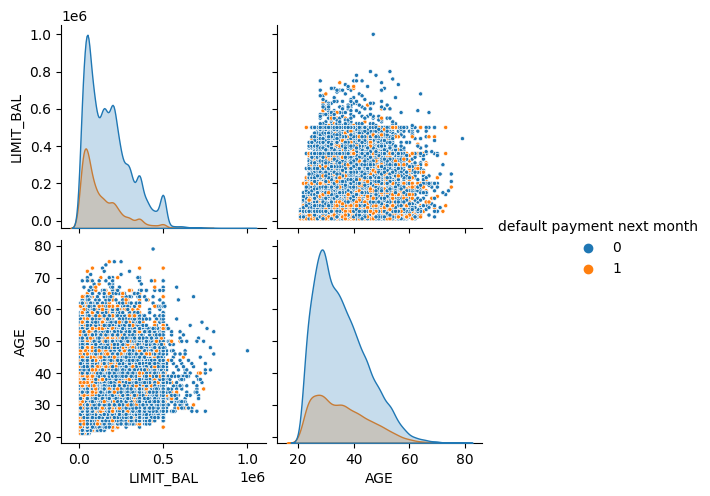

In [ ]:
# Among the predictors, only LIMIT_BAL and AGE are the numeric variables
# Creating a pairwise scatter plot for these variables

attributes = ['LIMIT_BAL','AGE','default payment next month']
sns.pairplot(df_features[attributes], hue='default payment next month', markers='.');

## II. Preparing a Pipeline

In [ ]:
# Separating the predictors and target variables
X = df_features.drop('default payment next month', axis=1)
y = df_features['default payment next month'].copy()

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (29932, 5)
Shape of y: (29932,)


In [ ]:
# Splitting the data into Train & Test sets in order to apply the pipeline separately on both
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### 2.1 Standardizing Numeric Attributes

In [ ]:
# Importing StandardScaler() in order to standardize the varying ranges of LIMIT_BAL and AGE columns
from sklearn.preprocessing import StandardScaler

# Listing out the numeric columns to standardize
num_attributes = ['LIMIT_BAL','AGE']

### 2.2 One-Hot-Encoding Categorical Attributes

In [ ]:
# Importing OneHotEncoder() in order to convert all categorical columns to columns of 0/1 variables
from sklearn.preprocessing import OneHotEncoder

# Listing out the categorical columns to encode
cat_attributes = ['SEX','EDUCATION','MARRIAGE']

#### Combining above steps into a Pipeline

In [ ]:
# Importing necessary librabries
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram') # Displays pipeline graphically

# Defining the ColumnTransformer for each type of variable and the action to be performed on them
preprocessing_steps = ColumnTransformer([
                      ('num', StandardScaler(), num_attributes),
                      ('cat', OneHotEncoder(drop='first'), cat_attributes)
                      ])

# Printing the preprocessing pipeline
preprocessing_steps

ColumnTransformer(transformers=[('num', StandardScaler(), ['LIMIT_BAL', 'AGE']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['SEX', 'EDUCATION', 'MARRIAGE'])])

### 2.3 Fitting a *RandomForest* Classifier

In [ ]:
# Importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier pipeline and combining the above preprocessing steps
rf_pipeline = Pipeline([('Preprocessor', preprocessing_steps), ('Model', RandomForestClassifier(random_state=42))]) # do we have to put random_state here?

# Take a look at the new pipeline
rf_pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('Model', RandomForestClassifier(random_state=42))])

#### Fitting the Random Forest Pipeline to Train set

In [ ]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('Model', RandomForestClassifier(random_state=42))])

## III. Hyperparameter Tuning for Random Forest

### 3.1 Grid Search Strategy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'Model__max_depth': [10, 20, 30, 40, 50], 'Model__min_samples_leaf': [1, 2, 3, 4, 5]}]

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

print('The best parameters are: ', grid_search.best_params_)
print('\n The highest balanced accuracy is:', grid_search.best_score_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The best parameters are:  {'Model__max_depth': 40, 'Model__min_samples_leaf': 1}

 The highest balanced accuracy is: 0.5281445707519278


,param_Model__max_depth,param_Model__min_samples_leaf,mean_test_score
15,40,1,0.528145
20,50,1,0.528145
10,30,1,0.528087
5,20,1,0.526257
6,20,2,0.519880


### 3.2 Random Search Strategy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = [{'Model__max_depth': randint(10,50), 'Model__min_samples_leaf': randint(1,10)}]

random_search = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_distribs, n_iter=25, cv=5, scoring='balanced_accuracy',
                                   random_state=42)
random_search.fit(X_train, y_train)

print('The best parameters are: ', random_search.best_params_)
print('\n The highest balanced accuracy is:', random_search.best_score_)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The best parameters are:  {'Model__max_depth': 23, 'Model__min_samples_leaf': 1}

 The highest balanced accuracy is: 0.5283422577081259


,param_Model__max_depth,param_Model__min_samples_leaf,mean_test_score
23,23,1,0.528342
12,34,1,0.528116
18,34,2,0.519013
24,45,2,0.519013
6,33,3,0.514497


### 3.3 Bayesian Search Strategy

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer

param_grid = [{'Model__max_depth': Integer(10, 50), 'Model__min_samples_leaf': Integer(1, 10)}]

bayes_search = BayesSearchCV(rf_pipeline, param_grid, n_iter=25, cv=5, scoring='balanced_accuracy', random_state=42)
bayes_search.fit(X_train, y_train)

print('The best parameters are:', bayes_search.best_params_)
print('\n The highest balanced accuracy is:', bayes_search.best_score_)

# halving_search.best_estimator_
bayes_cv_res = pd.DataFrame(bayes_search.cv_results_)
bayes_cv_res.sort_values(by=['mean_test_score'], ascending=False, inplace=True)
bayes_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The best parameters are: OrderedDict([('Model__max_depth', 25), ('Model__min_samples_leaf', 1)])

 The highest balanced accuracy is: 0.5285608828336644


,param_Model__max_depth,param_Model__min_samples_leaf,mean_test_score
22,25,1,0.528561
18,42,1,0.528145
11,50,1,0.528145
12,34,1,0.528116
10,15,1,0.522528


### **Comparing the strategies**
Three different search strategies have been executed for the purpose of hyper-parameter tuning and choosing the best Random Forest Classifier model, namely, (1) Grid Search CV, (2) Randomized Search CV, and (3) Bayesian Search CV. The search has been done over *max_depth* and *min_samples_leaf* parameters to find the best model per balanced accuracy metric. For meaningfully comparing all 3 searches, we have kept the parameter grid/distribution space consistent across the strategies. This will help us understand which search method performs best given a similar parameter space to choose from. Each of the search strategies yielded the following results:

1.   **Grid Search:** Given a total of 25 combinations of max_depth and min_samples_leaf to run over, this search produced the highest balanced accuracy as **0.5281** with the optimal parameters being *max_depth = 40 and min_samples_leaf = 1.*
2.   **Randomized Search:** Similarly, having provided a discrete uniform distribution over the ranges (10,50) and (1,10) for max_depth and min_samples_leaf respectively, we obtained maximum balanced accuracy as **0.5283** with *max_depth = 23 and min_samples_leaf = 1.*
3.   **Bayesian Search:** Finally, for this search strategy, keeping the parameter space consistent as above, we see a balanced accuracy of **0.5285** with optimal hyper-parameters as *max_depth = 25 and min_samples_leaf = 1.*

On observing the results from the above search strategies we see very minor differences in the balanced accuracy obtained from each. Although, it is worth noting that the Bayesian Search strategy comes out on the top with the highest balanced accuracy among the three (52.85%). Taking this into consideration, we can further use the best estimator model obtained from Bayesian search to predict on the test set.



In [ ]:
# Using best_estimator_ model of the best strategy (Bayes) to predict on the test set
from sklearn.metrics import balanced_accuracy_score

y_pred = bayes_search.best_estimator_.predict(X_test)
print('The balanced accuracy on the test set is:', balanced_accuracy_score(y_test, y_pred))

The balanced accuracy on the test set is: 0.512882266757094


## IV. Minimizing Cost


In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix

# Defining the cost function we want to minimize
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0]*1 + cm[0,1]*10

# Initializing the cost scorer
cost_scorer = make_scorer(default_cost, greater_is_better=False)

#### With Random Search

In [ ]:
param_distribs = [{'Model__max_depth': randint(1,50), 'Model__min_samples_leaf': randint(1,20)}]

random_search = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_distribs, cv=5,
                                   n_iter=20, scoring=cost_scorer, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Minimum cost obtained: ", -random_search.best_score_)

Best hyperparameters:  {'Model__max_depth': 2, 'Model__min_samples_leaf': 1}
Minimum cost obtained:  994.6


## V. Collaboration

- **Lectures:** I referred to Labs 4, 5, 6, and 7 to get code structures and also refresh my understanding of all the topics touched upon in this assignment.
- **Classmates:** I discussed the rationale of the cost function with a couple of my classmates, where we helped each other understand the cost function that had to be minimized. Another topic that we had discussions on were regarding the ranges of hyper-parameters.